In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import matplotlib.pyplot as plt
import swan_vis as swan

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [3]:
ab = '../../lr_bulk/talon/human_talon_abundance.tsv'
filt_ab = '../../lr_bulk/cerberus/cerberus_filtered_abundance.tsv'
read_annot = '../../lr_bulk/talon/human_talon_read_annot.tsv'
t_metadata = '../../refs/cerberus/v40_transcript_metadata.tsv'
swan_file = '../../lr_bulk/cerberus/swan/swan_meta.p'
cerberus_h5 = '../../lr_bulk/cerberus/triplets/cerberus_annot_triplets.h5'
major_isos = '../../lr_bulk/cerberus/swan/major_isos.tsv'

ver = 'v40_cerberus'

min_tpm = 1
gene_subset = 'polya'
go_gene_subset = 'protein_coding'
obs_col = 'sample'

mouse_ab = '../../mouse/lr_bulk/talon/mouse_talon_abundance.tsv'
mouse_filt_ab = '../../mouse/lr_bulk/cerberus/cerberus_filtered_abundance.tsv'
mouse_read_annot = '../../mouse/lr_bulk/talon/mouse_talon_read_annot.tsv'
mouse_swan_file = '../../mouse/lr_bulk/swan/swan.p'
mouse_meta = '../../mouse/lr_bulk/lr_mouse_library_data_summary.tsv'
mouse_t_metadata = '../../mouse/refs/cerberus/vM25_transcript_metadata.tsv'
mouse_ver = 'vM25_cerberus'


In [8]:
def plot_feat_len_hist(cerberus_h5,
                       filt_ab,
                       feat,
                       gene_subset,
                       min_tpm,
                       ofile):
    ca = cerberus.read(cerberus_h5)
    
    ids = get_det_feats(cerberus_h5, 
                        filt_ab,
                        feat, 
                        how=feat,
                        gene_subset=gene_subset,
                        min_tpm=min_tpm)
    if feat == 'tss':
        df = ca.tss.loc[ca.tss.Name.isin(ids)]
    elif feat == 'tes':
        df = ca.tes.loc[ca.tes.Name.isin(ids)]
    df['region_len'] = abs(df.Start-df.End)
    print(df.region_len.min())

    sns.set_context('paper', font_scale=2)
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['pdf.fonttype'] = 42

    c_dict, order = get_feat_colors(feat)
    color = c_dict[feat]

    ax = sns.displot(df, x='region_len', kind='hist',
             linewidth=0,
             color=color, 
             alpha=1,
             binwidth=25,
             edgecolor=None,
             log_scale=(False, True))

    
    ax = plt.gca()
    ylim = ax.get_ylim()
    ax.set_ylim(1**-4, ylim[1])

    df.region_len.max()
    ylabel = f'# {feat.upper()}s'
    xlabel = f'{feat.upper()} length (bp)'

    ax.set(xlabel=xlabel, ylabel=ylabel)
    plt.savefig(ofile, dpi=700, bbox_inches='tight')    

In [ ]:
plot_feat_len_hist(cerberus_h5,
                   filt_ab,
                   'tss',
                   gene_subset,
                   min_tpm,
                   'figures/tss_len_hist.pdf')
plot_feat_len_hist(cerberus_h5,
                   filt_ab,
                   'tes',
                   gene_subset,
                   min_tpm,
                   'figures/tss_len_hist.pdf')

Calculating tss TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2023: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tsss detected: 76487
# tsss >= 1 tpm: 67730
Applying gene type and novelty subset
Number of tsss reported: 64664
101
Calculating tes TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2024: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:2023: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tess detected: 87670
# tess >= 1 tpm: 77369
Applying gene type and novelty subset
Number of tess reported: 74318
101


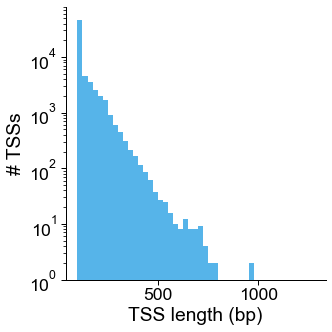

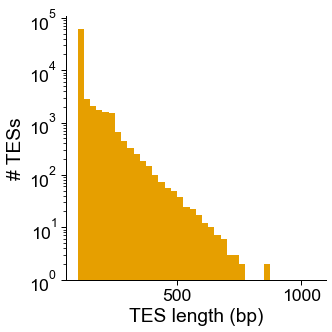

In [6]:
ca = cerberus.read(cerberus_h5)


feats = ['tss', 'tes']
for feat in feats:
    
    ids = get_det_feats(cerberus_h5, 
                        filt_ab,
                        feat, 
                        how=feat,
                        gene_subset='polya',
                        min_tpm=1)
    if feat == 'tss':
        df = ca.tss.loc[ca.tss.Name.isin(ids)]
    elif feat == 'tes':
        df = ca.tes.loc[ca.tes.Name.isin(ids)]
    df['region_len'] = abs(df.Start-df.End)
    print(df.region_len.min())

    sns.set_context('paper', font_scale=2)
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['pdf.fonttype'] = 42

    c_dict, order = get_feat_colors(feat)
    color = c_dict[feat]

    ax = sns.displot(df, x='region_len', kind='hist',
             linewidth=0,
             color=color, 
             alpha=1,
             binwidth=25,
             edgecolor=None,
             log_scale=(False, True))

    # ax = sns.displot(data=df, kind='hist', x='region_len', color=color,
    #                  log_scale=(False,True), edgecolor=None,
    #                  binwidth=25, alpha=1)
    
    ax = plt.gca()
    ylim = ax.get_ylim()
    ax.set_ylim(1**-4, ylim[1])
    # ax.set_yscale('log')

    df.region_len.max()
    ylabel = f'# {feat.upper()}s'
    xlabel = f'{feat.upper()} length (bp)'

    ax.set(xlabel=xlabel, ylabel=ylabel)
    # fname = f'{fig_dir}/human_detected_{f}_lengths.pdf'
    # plt.savefig(fname, dpi=700, bbox_inches='tight')    